<a href="https://colab.research.google.com/github/luismael15/DeFi_Research/blob/main/Defi_Research_Top_10_Protocols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Load the dataset
file_path = '/content/chain-dataset-All.csv'
df = pd.read_csv(file_path, header=None, sep=',', on_bad_lines='warn', engine='python') # Changed code
df = df.T

In [66]:
df.columns = df.iloc[0]  # Take the first row as column names
df = df[1:]  # Drop the old header row

In [67]:
# Rename the "Protocol" column to "Date"
df.rename(columns={"Protocol": "Date"}, inplace=True)

In [68]:
# Ensure 'Date' is in datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Convert all other columns to numeric (Total, Token Store, Protocols)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

# Set 'Date' as the index
df.set_index("Date", inplace=True)

<ipython-input-68-5e7566d9cdc3>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [69]:
# Replace NaN values with zeros
df = df.fillna(0)

<ipython-input-69-e9a61acc57f1>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


In [70]:
# Filter data for the last 5 years
start_date = '2020-01-01'
end_date = '2025-03-19'
df_filtered = df[(df.index >= start_date) & (df.index <= end_date)]

In [71]:
# Calculate average TVL for each protocol
protocol_columns = df_filtered.columns[3:]
avg_tvl = df_filtered[protocol_columns].mean().sort_values(ascending=False).head(10)
print(avg_tvl)

0
MakerDAO           6.766570e+09
Curve DEX          5.218919e+09
AAVE V2            4.152038e+09
AAVE V3            3.352017e+09
EigenLayer         2.941845e+09
Compound V2        2.927716e+09
JustLend           2.705271e+09
Uniswap V3         2.207643e+09
Uniswap V2         2.203629e+09
PancakeSwap AMM    2.000636e+09
dtype: float64


In [73]:
# Create a DataFrame from the result
result_df = pd.DataFrame({
    'Protocol': avg_tvl.index,
    'AVG TVL ($ Billions)': avg_tvl.values / 1e9  # Convert to billions
})

# Round AVG TVL to two decimal places
result_df['AVG TVL ($ Billions)'] = result_df['AVG TVL ($ Billions)'].round(4)

# Print the table
print(result_df)

          Protocol  AVG TVL ($ Billions)
0         MakerDAO                6.7666
1        Curve DEX                5.2189
2          AAVE V2                4.1520
3          AAVE V3                3.3520
4       EigenLayer                2.9418
5      Compound V2                2.9277
6         JustLend                2.7053
7       Uniswap V3                2.2076
8       Uniswap V2                2.2036
9  PancakeSwap AMM                2.0006


In [78]:
# Identify the top 10 protocols by average TVL
top_protocols = avg_tvl.head(10).index

# Calculate max, min, and latest TVL for these top protocols
max_tvl = df_filtered[top_protocols].max()
latest_tvl = df_filtered[top_protocols].iloc[-1]

# Create a DataFrame from the results
result_df = pd.DataFrame({
    'Protocol': top_protocols,
    'AVG TVL ($ Billions)': avg_tvl.head(10).values / 1e9,
    'MAX TVL ($ Billions)': max_tvl.values / 1e9,
    'LATEST TVL ($ Billions)': latest_tvl.values / 1e9
})

# Round values to two decimal places
result_df[['AVG TVL ($ Billions)', 'MAX TVL ($ Billions)', 'LATEST TVL ($ Billions)']] = result_df[['AVG TVL ($ Billions)', 'MAX TVL ($ Billions)', 'LATEST TVL ($ Billions)']].round(4)

# Print the table
print(result_df)

          Protocol  AVG TVL ($ Billions)  MAX TVL ($ Billions)  \
0         MakerDAO                6.7666               19.8200   
1        Curve DEX                5.2189               24.2980   
2          AAVE V2                4.1520               18.4369   
3          AAVE V3                3.3520               22.3208   
4       EigenLayer                2.9418               20.1247   
5      Compound V2                2.9277               12.3121   
6         JustLend                2.7053                9.2706   
7       Uniswap V3                2.2076                4.8239   
8       Uniswap V2                2.2036               10.0007   
9  PancakeSwap AMM                2.0006                7.7954   

   LATEST TVL ($ Billions)  
0                   2.4381  
1                   1.6328  
2                   0.3253  
3                  17.4499  
4                   8.5236  
5                   0.4460  
6                   3.4584  
7                   2.8107  
8           

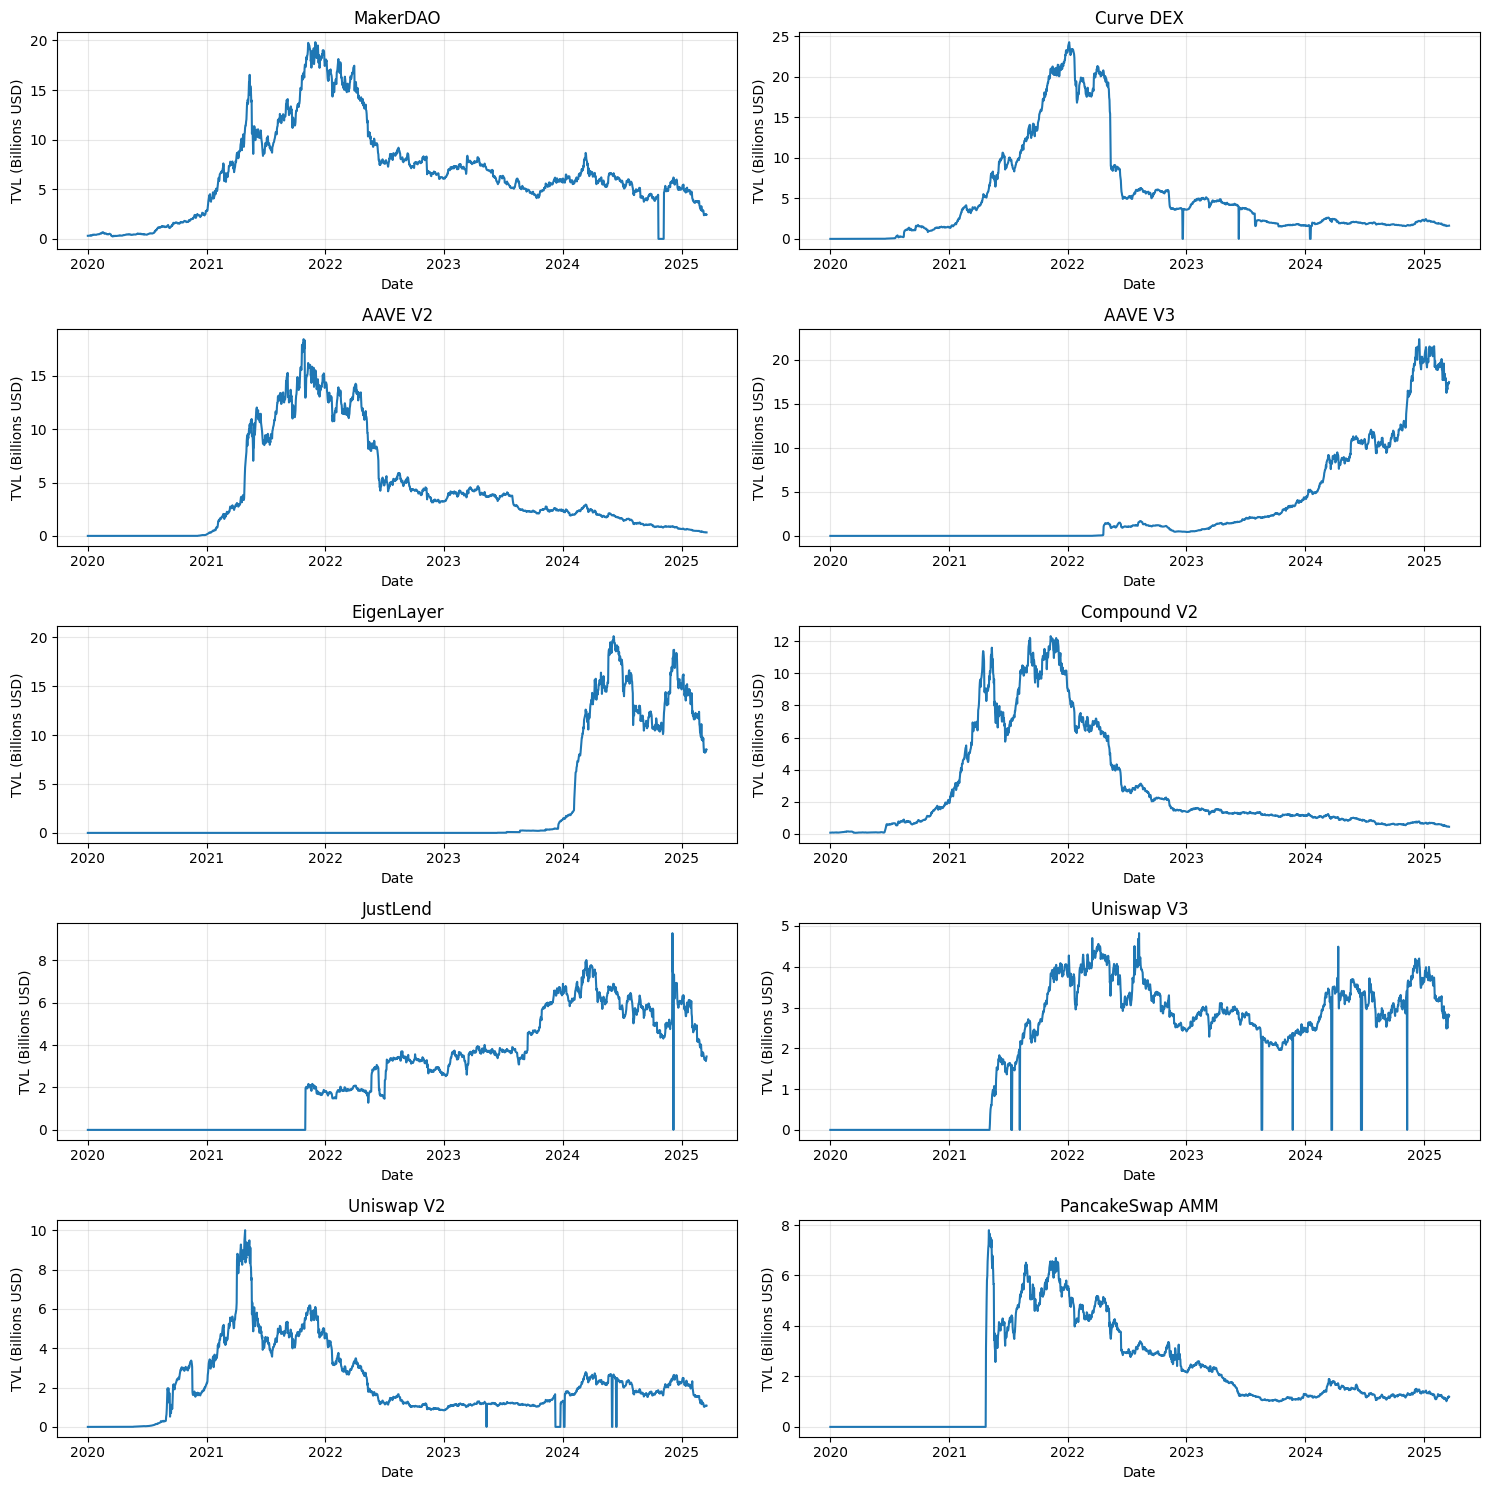

In [80]:
# Identify the top 10 protocols by average TVL
top_protocols = avg_tvl.head(10).index

# Plot the TVL evolution for each protocol in separate plots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

for i, protocol in enumerate(top_protocols):
    row = i // 2
    col = i % 2
    axs[row, col].plot(df_filtered[protocol] / 1e9)
    axs[row, col].set_title(protocol)
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('TVL (Billions USD)')
    axs[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
